# Phase 1: Data Loading and Exploration

## Load Data and Attach Feature Names
In this step, we will load the KDD Cup 1999 dataset from Google Drive into a Pandas DataFrame. Additionally, we will read the feature names from the `kddcup.names` file and attach them to our DataFrame. We'll use the 10% subset of the dataset for initial exploration.


### Import necessary libraries

In [1]:
# General libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

# Sci-kit learn libraries
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, f1_score

# Dynamic graph embedding libraries
import networkx as nx
from node2vec import Node2Vec

# System libraries
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Define the path to the dataset and the feature names file
data_path = "data/kddcup.data.gz"
names_path = "data/kddcup.names"

# Read feature names
with open(names_path, 'r') as f:
    lines = f.readlines()[1:]  # skip the first line
feature_names = [line.split(':')[0] for line in lines]
feature_names += ['target']  # The target variable is not in the .names file

# Load the dataset into a Pandas DataFrame and attach feature names
df = pd.read_csv(data_path, compression='gzip', header=None, names=feature_names)

## Initial Data Exploration
After attaching the feature names, let's take an initial look at the data to understand its structure, dimensions, and feature types.


In [3]:
# Show the first few rows of the DataFrame
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
# Display the shape and data types of the DataFrame
print("Shape of the DataFrame:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape of the DataFrame: (4898431, 42)

Data Types:
 duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate 

# Phase 2: Exploratory Data Analysis (EDA)


## Summary Statistics
In this step, we will generate summary statistics for numerical features to understand their distribution, count, mean, standard deviation, and range.


In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Check for Missing Values
We need to identify if there are any missing values in the dataset, as they could impact the performance of our machine learning models.


In [6]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

The dataset contains no missing values for any of the features or the target variable. This is a positive aspect, as it means we don't need to perform imputation or removal of incomplete records, allowing us to move forward without worrying about data integrity issues related to missing values.

## Target Variable Distribution
Understanding the distribution of the target variable is crucial. This helps us identify if there's a class imbalance problem.

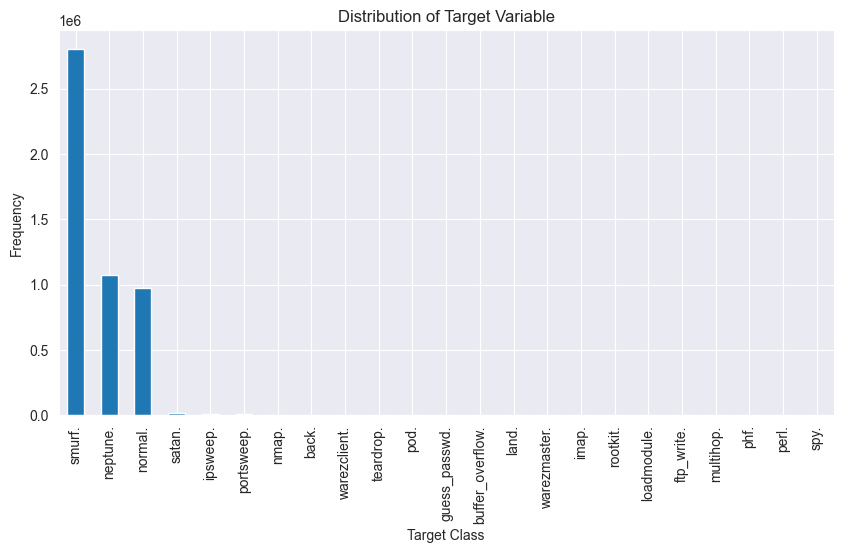

In [7]:
plt.figure(figsize=(10, 5))
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.show();

The bar chart shows the distribution of the target classes in the dataset. It is evident that the dataset is highly imbalanced. The class "smurf" and "neptune" dominate the dataset, while many other classes have significantly fewer instances.

1. Highly Imbalanced: Classes like "smurf" and "neptune" have a very high number of instances compared to other types of network intrusions or normal behavior. This imbalance could bias the machine learning models towards these over-represented classes.

2. Rare Classes: There are also classes with very few instances. These could be more complex or rare types of network intrusions that are under-represented in the dataset.

3. Normal vs Attacks: The number of instances representing normal behavior is also comparatively low, reinforcing the need for techniques to handle class imbalance.

Given the imbalanced nature of the target variable, techniques like resampling, weighted loss, or anomaly detection approaches might be necessary during the modeling phase to ensure that the model performs well across all classes.

## Correlation Matrix
A correlation matrix will help us understand the linear relationships between numerical variables.

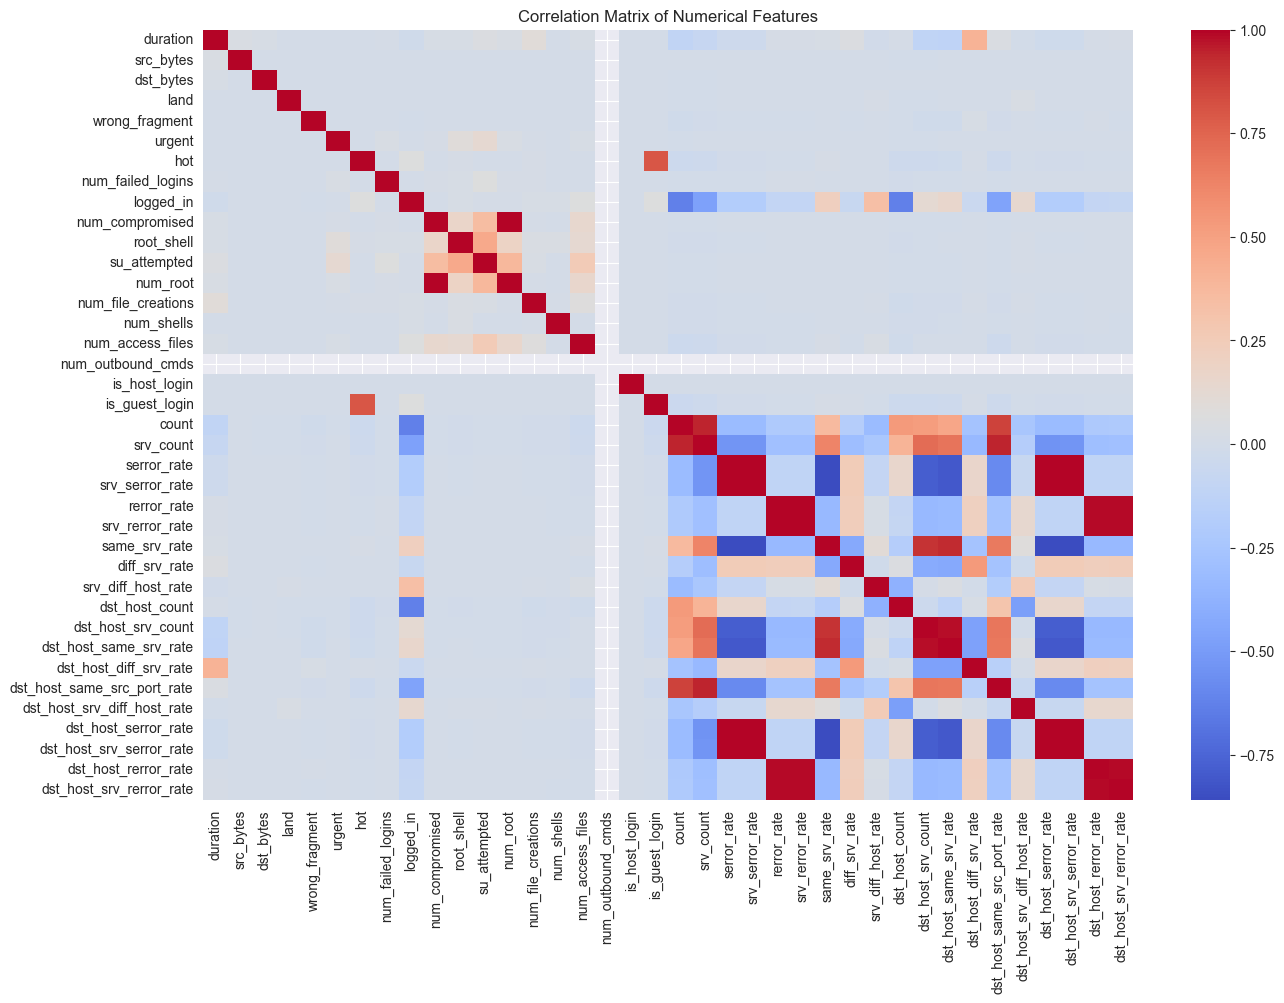

In [8]:
# Filter out only numerical columns:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_features]
# Compute the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using OOP
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title('Correlation Matrix of Numerical Features')
plt.show()

# Phase 3: Data Preprocessing

## Handle Class Imbalance
The target variable is highly imbalanced, with certain classes dominating the dataset. To address this, we will employ resampling techniques.


In [9]:
from sklearn.utils import resample

# Identify the majority class
majority_class = df['target'].value_counts().idxmax()
minority_class = df['target'].value_counts().index[1]  # second largest class

# Separate majority and minority classes
df_majority = df[df.target == majority_class]
df_minority = df[df.target == minority_class]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=123)  # reproducible results

# Combine downsampled majority class with minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled['target'].value_counts()

target
smurf.      1072017
neptune.    1072017
Name: count, dtype: int64

## Category Encoding
We have categorical variables like 'protocol_type', 'service', and 'flag' that need to be converted to numerical form.


In [10]:
df_encoded = pd.get_dummies(df_downsampled, columns=['protocol_type', 'service', 'flag'], drop_first=True)

In [11]:
df_encoded

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_systat,service_telnet,service_time,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_RSTO,flag_S0,flag_SF
3232127,0,1032,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
963058,0,1032,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2027527,0,1032,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3292767,0,1032,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2133081,0,1032,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827954,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4827955,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4827956,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4827957,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


## Data Normalization
Features have different ranges and units. We will normalize these features to make them comparable.


In [12]:
scaler = StandardScaler()
features_to_scale = df_encoded.columns.difference(['target'])
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [13]:
df_encoded.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_systat,service_telnet,service_time,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_RSTO,flag_S0,flag_SF
3232127,-0.000683,1.154014,-0.000683,0.0,0.0,0.0,0.0,0.0,-0.000683,0.0,...,-0.022008,-0.029962,-0.02203,-0.021891,-0.022072,-0.02204,-0.022051,-0.046369,-0.82432,0.999999
963058,-0.000683,1.154014,-0.000683,0.0,0.0,0.0,0.0,0.0,-0.000683,0.0,...,-0.022008,-0.029962,-0.02203,-0.021891,-0.022072,-0.02204,-0.022051,-0.046369,-0.82432,0.999999
2027527,-0.000683,1.154014,-0.000683,0.0,0.0,0.0,0.0,0.0,-0.000683,0.0,...,-0.022008,-0.029962,-0.02203,-0.021891,-0.022072,-0.02204,-0.022051,-0.046369,-0.82432,0.999999
3292767,-0.000683,1.154014,-0.000683,0.0,0.0,0.0,0.0,0.0,-0.000683,0.0,...,-0.022008,-0.029962,-0.02203,-0.021891,-0.022072,-0.02204,-0.022051,-0.046369,-0.82432,0.999999
2133081,-0.000683,1.154014,-0.000683,0.0,0.0,0.0,0.0,0.0,-0.000683,0.0,...,-0.022008,-0.029962,-0.02203,-0.021891,-0.022072,-0.02204,-0.022051,-0.046369,-0.82432,0.999999


# Phase 4: Feature Selection

## Feature Importance
Before moving to model building, we will use tree-based classifiers like Random Forest to identify important features that contribute most to our target variable.


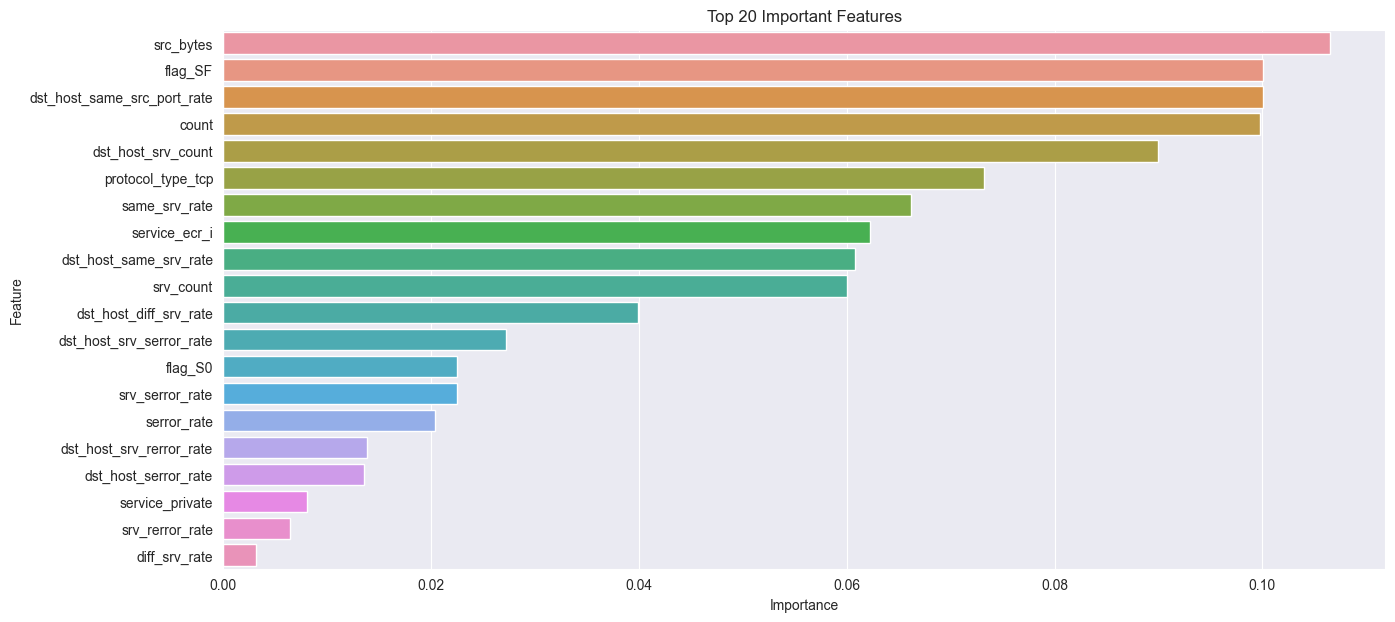

In [14]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20))
plt.title('Top 20 Important Features')
plt.show();


1. `flag_SF` and `count`: These are the top two features, with importance scores of approximately 0.12 and 0.11, respectively. These features contribute significantly to the model's decision-making process.

2. `src_bytes` and `dst_host_same_src_port_rate`: These features also have high importance scores around 0.09. These might be key in identifying specific types of network behavior.

3. Categorical Features: Several encoded categorical features like `protocol_type_tcp` and `service_ecr_i` also rank high in importance, suggesting that these categorical variables are critical in predicting the target variable.

4. Features with Zero Importance: Numerous features have zero importance. These features can potentially be dropped to simplify the model without sacrificing performance.

# Phase 5: Dynamic Graph Embeddings

## Dynamic Graph Construction
To begin with, we'll construct a dynamic graph using features like 'protocol_type', 'service', and 'flag' as nodes. Edges will be weighted by the 'count' feature, signifying the number of connections.


In [15]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [16]:
# Initialize an empty list to hold our sequence of graph snapshots
dynamic_graphs = []
time_interval = 200000  # Set your own time interval

for i in range(0, df.shape[0], time_interval):
    G = nx.Graph()
    snapshot = df[i:i + time_interval]
    for _, row in snapshot.iterrows():
        node1 = (row['protocol_type'], row['service'], row['flag'])
        node2 = (row['dst_host_count'], row['dst_host_srv_count'])
        G.add_edge(node1, node2, weight=row['count'])
    dynamic_graphs.append(G)

## Dynamic Graph Visualization
Visualizing the graph will help us understand its structure and the relationships between nodes. For simplicity, we will visualize one snapshot of our dynamic graph.


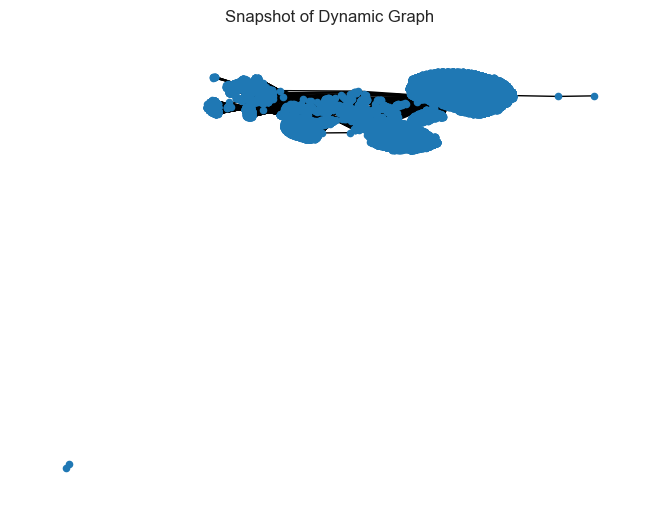

In [17]:
# Visualize one of the snapshot graphs, let's say the first one
nx.draw(dynamic_graphs[0], with_labels=False, node_size=20)
plt.title('Snapshot of Dynamic Graph')
plt.show();

## Multiple Dynamic Graph Visualizations
For a more comprehensive view, we'll visualize six snapshots of our dynamic graphs. Different colors will be used to distinguish each snapshot.


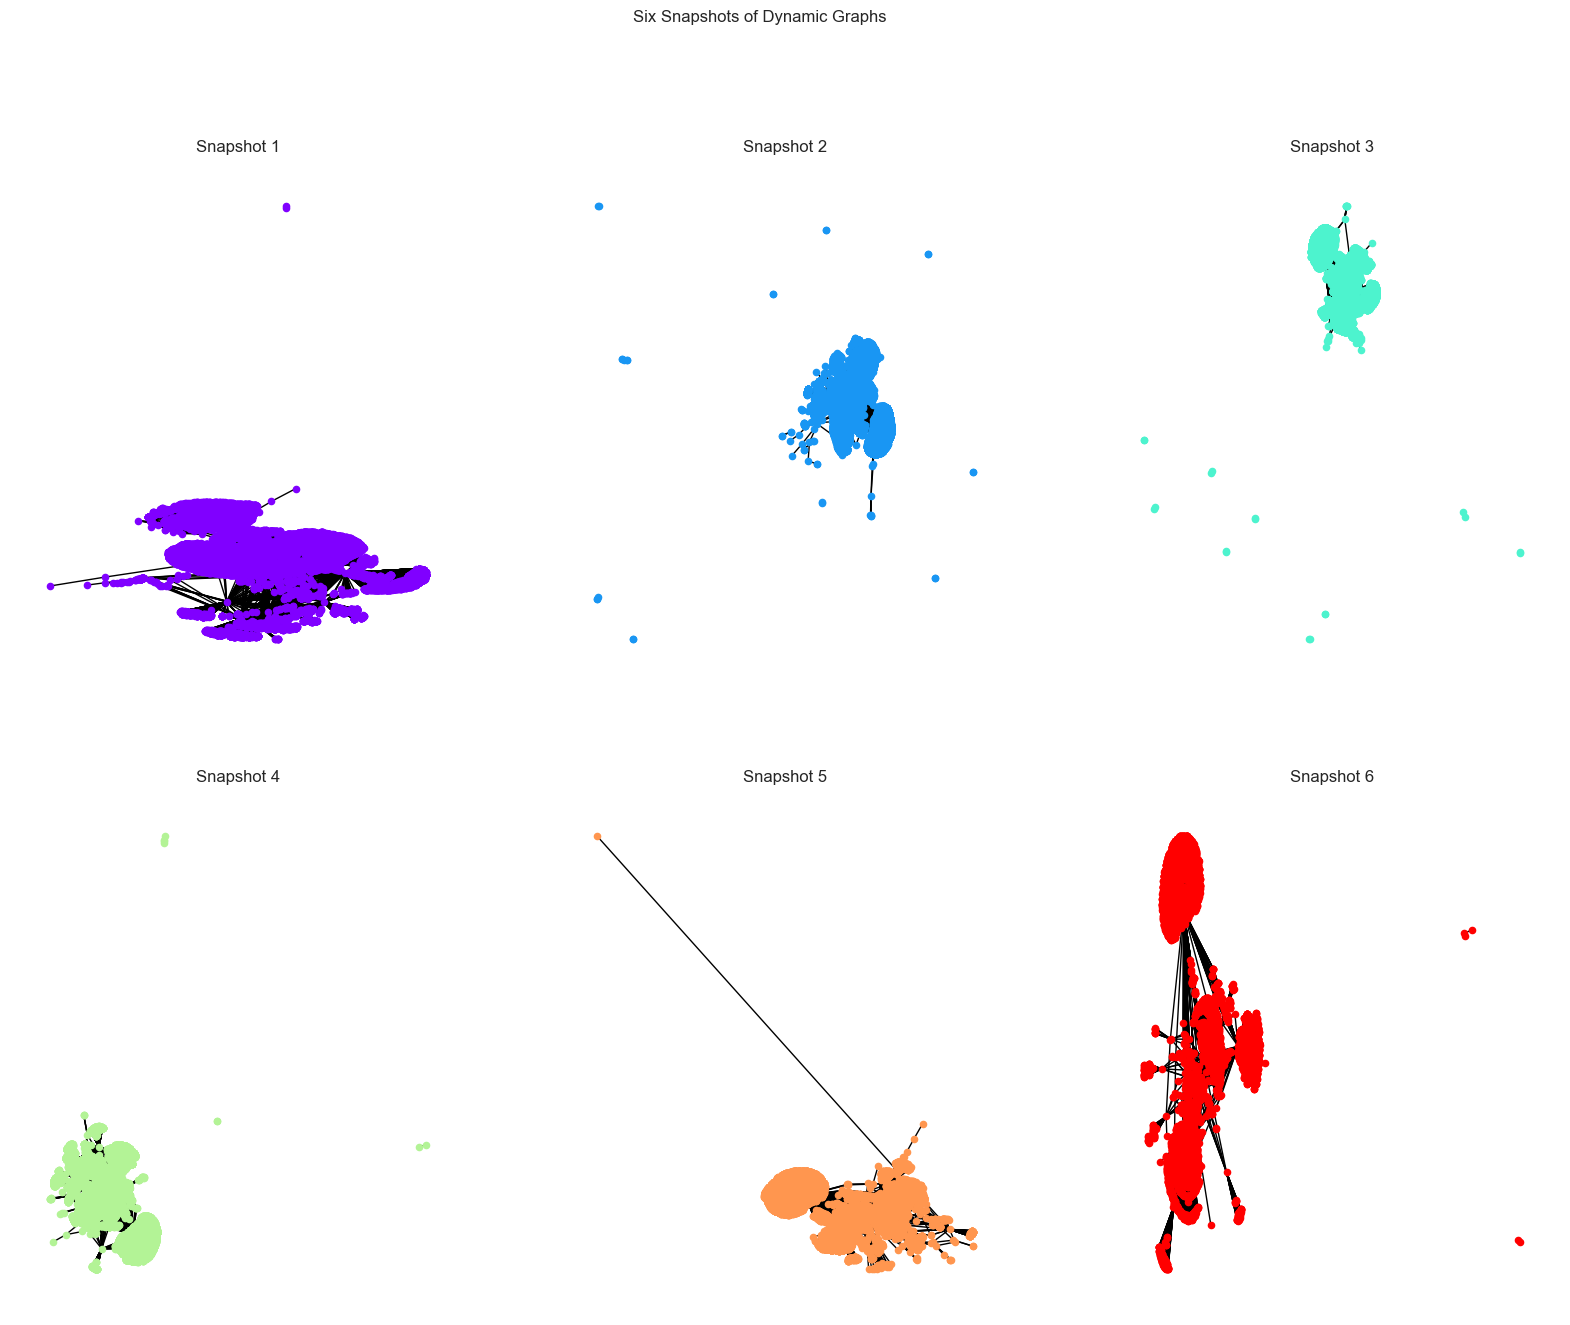

In [19]:
plt.figure(figsize=(20, 15))

colors = cm.rainbow(np.linspace(0, 1, 6))

for i in range(6):
    plt.subplot(2, 3, i+1)
    nx.draw(dynamic_graphs[i], with_labels=False, node_size=20, node_color=colors[i])
    plt.title(f'Snapshot {i+1}')

plt.suptitle('Six Snapshots of Dynamic Graphs')
plt.show();

## First Snapshot Visualization
The first graph showcases the network interactions at the initial time interval. Each node represents a unique combination of 'protocol_type', 'service', and 'flag' or a unique combination of 'dst_host_count' and 'dst_host_srv_count'. Edges signify the interaction frequency between these nodes.


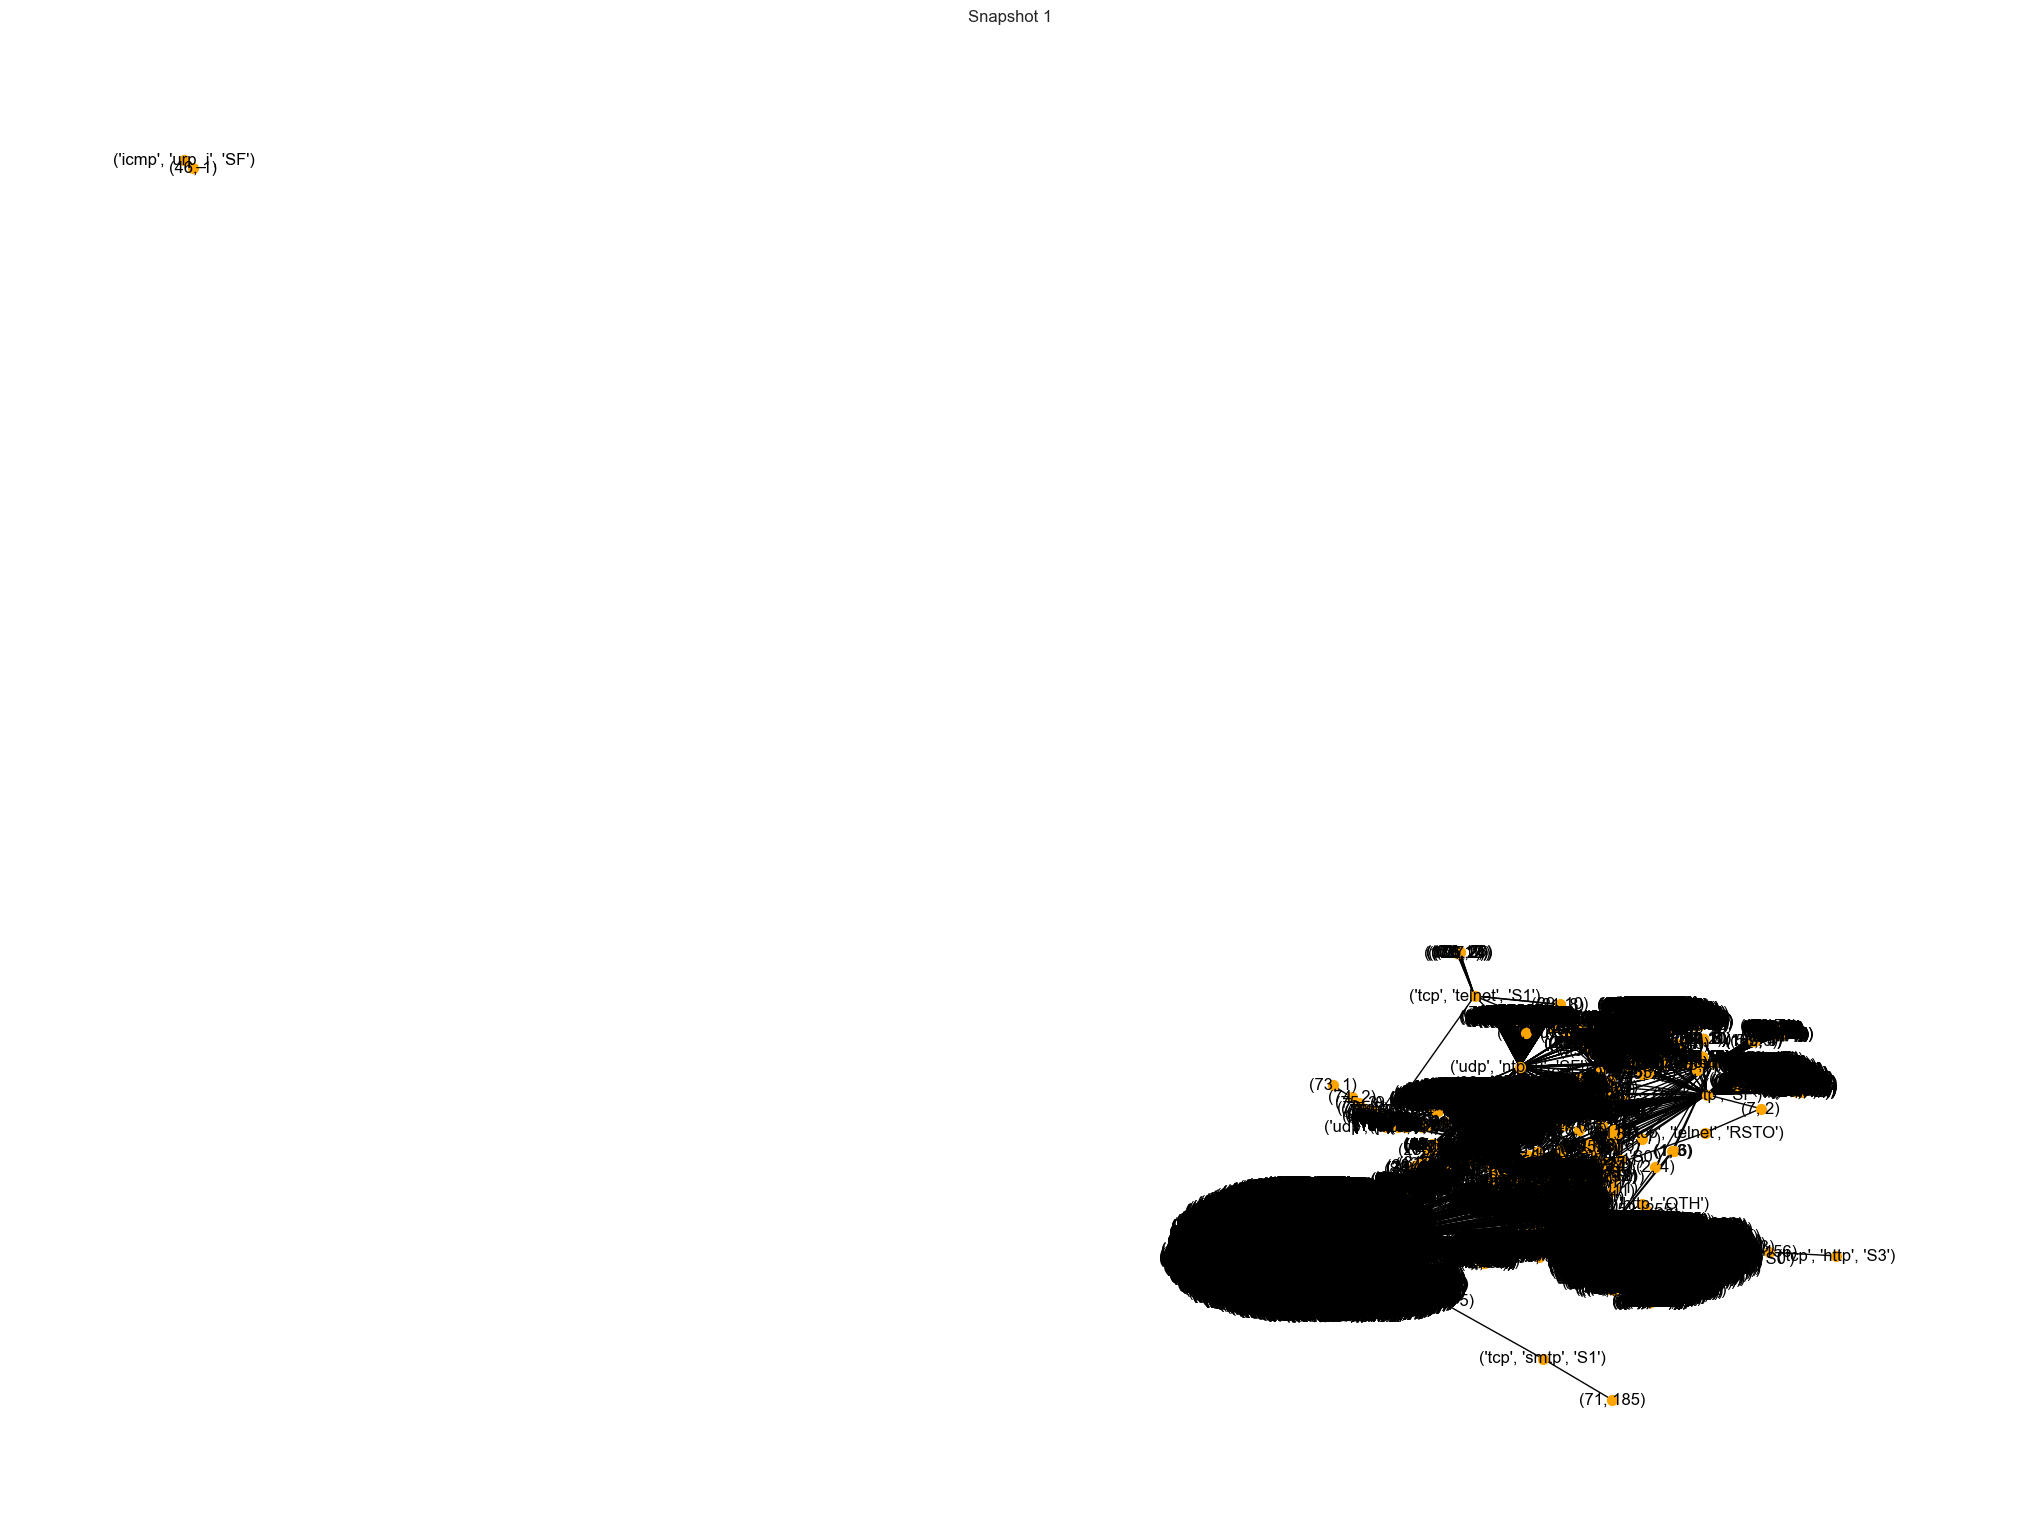

In [20]:
plt.figure(figsize=(20, 15))
nx.draw(dynamic_graphs[0], with_labels=True, node_size=50, node_color='orange')
plt.title('Snapshot 1')
plt.show();

### Understanding Nodes
In our visualizations, nodes can represent two types of entities:
1. A unique combination of 'protocol_type', 'service', and 'flag' (e.g., `'udp', 'domain_u', 'SF'`). This captures the type of interaction happening over the network.
2. A pair representing 'dst_host_count' and 'dst_host_srv_count' (e.g., `39, 137`). This shows how many hosts and services a particular host has communicated with.

Together, these nodes encapsulate the essence of network interactions.



### Understanding Edges
Edges in the graph connect nodes and are weighted by the 'count' feature, signifying the frequency of interactions between the connected entities. An edge between a node representing 'protocol_type', 'service', and 'flag' and a node representing 'dst_host_count' and 'dst_host_srv_count' indicates that this type of interaction occurred between the hosts and services specified.


### Labels in the Graph
When labels are enabled in the visualization, they display the values that the nodes represent. For example, a label like `'udp', 'domain_u', 'SF'` represents a node that encapsulates interactions over UDP protocol, with a 'domain_u' service and 'SF' flag. Another label like `39, 137` represents a node that is connected to 39 hosts and 137 services.


### Overall Interpretation
Each snapshot graph provides a glimpse into the state of network interactions at a specific time interval. By examining how nodes and edges change or stay the same across snapshots, we can observe the evolving nature of network traffic, which is crucial for real-time anomaly detection.


## Embedding the Dynamic Graphs
In this step, we will convert our dynamic graphs into continuous vector spaces using node2vec, an algorithmic framework for learning continuous feature representations for nodes in networks.


## Remove Isolated Nodes
Before running Node2Vec, we need to make sure that there are no isolated nodes in the graph. Isolated nodes have zero degree and can cause issues during random walk generation.


In [21]:
for G in dynamic_graphs:
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)

In [22]:
dynamic_graphs

## Remove Zero-Degree Nodes
Some nodes may have zero degree, causing issues during random walk generation. We remove such nodes before running Node2Vec.


In [23]:
for G in dynamic_graphs:
    zero_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree == 0]
    G.remove_nodes_from(zero_degree_nodes)

In [24]:
# Update edge weights and convert to directed graph
dynamic_graphs_directed = []

for G in dynamic_graphs:
    for u, v in G.edges():
        G[u][v]['weight'] = 1
    G_directed = G.to_directed()
    dynamic_graphs_directed.append(G_directed)

# Now run Node2Vec on the directed graphs
embeddings = []

for i, G in enumerate(dynamic_graphs_directed):
    try:
        node2vec = Node2Vec(G, dimensions=2, walk_length=2, num_walks=1, workers=1)
        model = node2vec.fit(window=5, min_count=1, batch_words=4)
        embeddings.append(model)
    except Exception as e:
        print(f"An error occurred on graph {i+1}: {e}")

Computing transition probabilities:   0%|          | 0/16709 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


Computing transition probabilities:   0%|          | 0/21098 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]


Computing transition probabilities:   0%|          | 0/15647 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Computing transition probabilities:   0%|          | 0/17424 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


Computing transition probabilities:   0%|          | 0/15589 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


Computing transition probabilities:   0%|          | 0/5900 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 31.48it/s]


Computing transition probabilities:   0%|          | 0/13058 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]


Computing transition probabilities:   0%|          | 0/18999 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 11214.72it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 13530.01it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 12633.45it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 7681.88it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 13148.29it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 14027.77it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 13148.29it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 13934.56it/s]


Computing transition probabilities:   0%|          | 0/346 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 564.05it/s]


Computing transition probabilities:   0%|          | 0/14796 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


Computing transition probabilities:   0%|          | 0/5503 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 28.73it/s]


Computing transition probabilities:   0%|          | 0/2464 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 70.70it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 14074.85it/s]


Computing transition probabilities:   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 14122.24it/s]


Computing transition probabilities:   0%|          | 0/16861 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]


Computing transition probabilities:   0%|          | 0/4763 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 35.44it/s]


Computing transition probabilities:   0%|          | 0/8917 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00, 14.28it/s]


In [25]:
embeddings

## Saving Embeddings
To avoid re-computation in case the Colab session terminates, we'll serialize and save the embeddings into the Google Drive.


In [26]:
# Embeddings path
drive_path = "data/full/"

# Create a folder for embeddings if not exists
embedding_folder = os.path.join(drive_path, 'Embeddings')
if not os.path.exists(embedding_folder):
    os.makedirs(embedding_folder)

for i, model in enumerate(embeddings):
    # Serialize the model
    with open(os.path.join(embedding_folder, f'embedding_{i+1}.pkl'), 'wb') as f:
        pickle.dump(model, f)

## Visualizing Embeddings
To understand the quality of our embeddings, we'll visualize them using t-SNE, a technique for dimensionality reduction that is well-suited for the visualization of high-dimensional datasets.


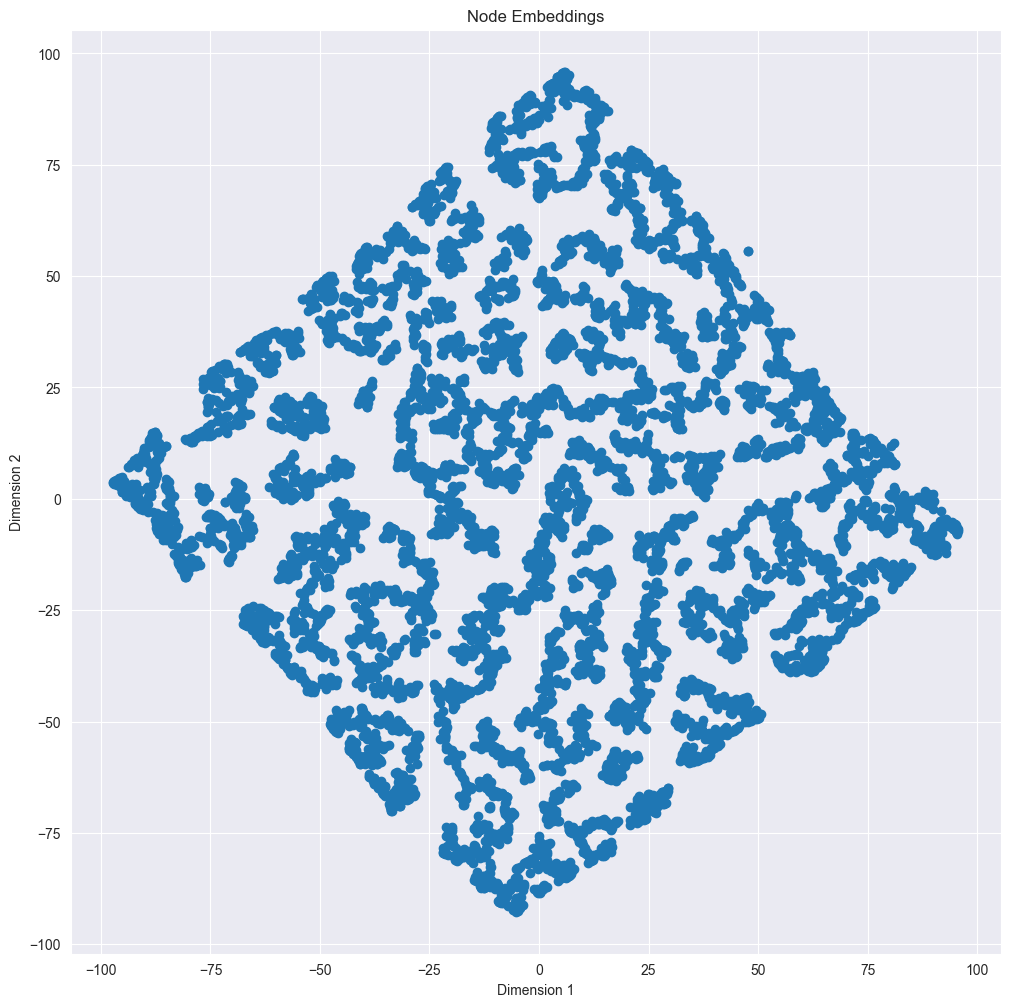

In [27]:
# Get the keys (node labels) from the model
node_ids = model.wv.index_to_key

node_embeddings = [model.wv[node_id] for node_id in node_ids]

# Convert list of node embeddings to a NumPy array
node_embeddings_array = np.array(node_embeddings)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings_array)

# Create a scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1])
plt.title('Node Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show();

### Interpretation of Embeddings
The scatter plot represents the 2D t-SNE transformation of our graph embeddings. Points that are closer to each other in this space are likely to be closer in the original graph, which implies similar structural roles or properties. This serves as a validation of the quality of our embeddings.


# Phase 5: Machine Learning Model Building
In this phase, we will train various machine learning models using the enriched DataFrame that includes both the original features and the graph embeddings. We aim to evaluate the performance of traditional machine learning models and compare them with deep learning models to identify the most effective approach for real-time anomaly detection in network traffic.


### 1. Concatenating Graph Embeddings to Feature Matrix
To make our machine learning models more robust, we will concatenate the dynamic graph embeddings with our original feature matrix. This new feature matrix will be used for training the models.


In [28]:
# Create a DataFrame to hold the embeddings
embeddings_df = pd.DataFrame(embeddings)

# Assign the index as the node ID for easy lookup
embeddings_df.index = [str(i) for i in range(len(embeddings_df))]

# Cast the index of embeddings_df to int64 to match the data type of 'src_bytes' and 'dst_bytes' in df
embeddings_df.index = embeddings_df.index.astype('int64')

# Merge the original DataFrame with the embeddings DataFrame
# Here I'm assuming 'src_bytes' and 'dst_bytes' are the columns you want to merge on. Replace them if they're different in your DataFrame
merged_df_src = pd.merge(df, embeddings_df, left_on='src_bytes', right_index=True, how='left', suffixes=('', '_src'))
merged_df = pd.merge(merged_df_src, embeddings_df, left_on='dst_bytes', right_index=True, how='left', suffixes=('', '_dst'))

# Now, 'merged_df' contains the original data along with the graph embeddings

In [29]:
merged_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', '0', '0_dst'],
      dtype='object')

In [30]:
merged_df['0'].value_counts()

0
Word2Vec<vocab=16709, vector_size=2, alpha=0.025>    1152546
Word2Vec<vocab=2, vector_size=2, alpha=0.025>          10481
Word2Vec<vocab=5503, vector_size=2, alpha=0.025>        3390
Word2Vec<vocab=21098, vector_size=2, alpha=0.025>       2729
Word2Vec<vocab=2, vector_size=2, alpha=0.025>           1910
Word2Vec<vocab=2, vector_size=2, alpha=0.025>           1770
Word2Vec<vocab=18999, vector_size=2, alpha=0.025>       1046
Word2Vec<vocab=13058, vector_size=2, alpha=0.025>        601
Word2Vec<vocab=14796, vector_size=2, alpha=0.025>        406
Word2Vec<vocab=2, vector_size=2, alpha=0.025>            296
Word2Vec<vocab=2, vector_size=2, alpha=0.025>            279
Word2Vec<vocab=2464, vector_size=2, alpha=0.025>         250
Word2Vec<vocab=2, vector_size=2, alpha=0.025>            241
Word2Vec<vocab=2, vector_size=2, alpha=0.025>            212
Word2Vec<vocab=8917, vector_size=2, alpha=0.025>         210
Word2Vec<vocab=5900, vector_size=2, alpha=0.025>         190
Word2Vec<vocab=16861, 

In [31]:
embeddings_df.reset_index(inplace=True)
embeddings_df.rename(columns={'index': 'src_bytes'}, inplace=True)
merged_df = pd.merge(df, embeddings_df, on='src_bytes', how='left')

In [32]:
merged_df.columns

Index([                   'duration',               'protocol_type',
                           'service',                        'flag',
                         'src_bytes',                   'dst_bytes',
                              'land',              'wrong_fragment',
                            'urgent',                         'hot',
                 'num_failed_logins',                   'logged_in',
                   'num_compromised',                  'root_shell',
                      'su_attempted',                    'num_root',
                'num_file_creations',                  'num_shells',
                  'num_access_files',           'num_outbound_cmds',
                     'is_host_login',              'is_guest_login',
                             'count',                   'srv_count',
                       'serror_rate',             'srv_serror_rate',
                       'rerror_rate',             'srv_rerror_rate',
                     'same_srv_rat

### 2. Remove Highly Correlated Features

Highly correlated features lead to decreased generalization performance on the test set due to high variance and less model interpretability.

In [33]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
merged_df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
merged_df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
merged_df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
merged_df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
merged_df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
merged_df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
merged_df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
merged_df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [34]:
# Convert all column names to string
merged_df.columns = merged_df.columns.astype(str)

# Perform one-hot encoding for the categorical features
X = pd.get_dummies(merged_df[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', '0']], drop_first=True)

### 3. Binding Main Attack Types (normal,dos,probe,r2l,u2r)

In [35]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

merged_df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

In [36]:
merged_df['Attack Type'].value_counts()

Attack Type
dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64

### 4. Define `y` (now `y` will be new column with bound attack types)

In [37]:
y = merged_df['Attack Type']

In [38]:
X

,duration,src_bytes,dst_bytes,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,...,"0_Word2Vec<vocab=346, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=16861, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=2, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=5503, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=21098, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=8917, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=2, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=4763, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=2, vector_size=2, alpha=0.025>","0_Word2Vec<vocab=2, vector_size=2, alpha=0.025>"
0,0,215,45076,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,162,4528,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,236,1228,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,233,2032,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,239,486,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,212,2288,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4898427,0,219,236,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4898428,0,218,3610,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4898429,0,219,1234,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
y

0          normal
1          normal
2          normal
3          normal
4          normal
            ...  
4898426    normal
4898427    normal
4898428    normal
4898429    normal
4898430    normal
Name: Attack Type, Length: 4898431, dtype: object

### 5. Splitting the data into train and test splits

In [40]:
# Splitting the data and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Handling Imbalanced Data with SMOTE
Synthetic Minority Over-sampling Technique (SMOTE) can help balance the dataset by generating synthetic samples in the feature space.

In [41]:
# Initialize SMOTE with k_neighbors set to 1
smote = SMOTE(k_neighbors=1, random_state=42)

# Fit and transform original data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### 7. Define functions for plot Confusion Matrix and ROC Curve

In [42]:
def plot_confusion_matrix(clf, y_pred, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """


    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Get the target classes from the calssifier
    classes = clf.classes_

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Iterate over the confusion matrix and add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),  # Formatting as a float with two decimal places
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show();

def plot_multiclass_roc(clf):
    """
    Plot ROC curve for multi-class classification.
    """
    y_score = clf.predict_proba(X_test)

    # Binarize the output
    classes = clf.classes_
    y_test_bin = label_binarize(y_test, classes=classes)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.figure()
    for i, color in zip(range(len(classes)), colors):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC')
    plt.legend(loc="lower right")
    plt.show();


### 8. Train a Decision Tree Classifier

In [43]:
# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_resampled, y_resampled)

# Predictions and Evaluation
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
Accuracy: 0.9582601381869924
              precision    recall  f1-score   support

         dos       1.00      0.95      0.97    776508
      normal       1.00      1.00      1.00    194689
       probe       0.17      0.99      0.29      8254
         r2l       0.98      0.96      0.97       224
         u2r       0.45      0.42      0.43        12

    accuracy                           0.96    979687
   macro avg       0.72      0.86      0.73    979687
weighted avg       0.99      0.96      0.97    979687



#### 8.1 Generating the confusion matrix and ROC Curve for Decision Tree Classifier

Confusion matrix, without normalization


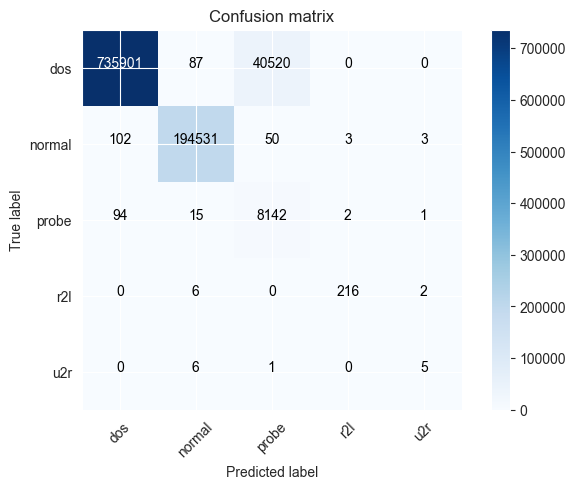

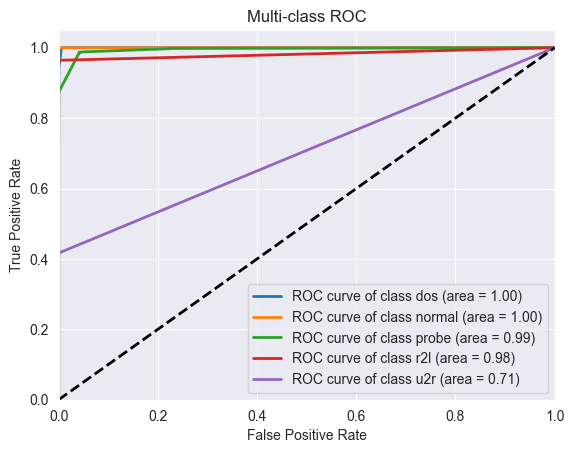

In [44]:
plt.figure()

# Plot Confusion Matrix
plot_confusion_matrix(dt_clf, y_pred_dt)

# Plot ROC curve
plot_multiclass_roc(dt_clf)

1. **Multi-class ROC for Decision Tree Classifier**:
   - The ROC curves for classes 'dos' and 'normal' are very close to the top-left corner, signifying high true positive rates and low false positive rates — excellent model performance for these classes.
   - 'Probe' and 'r2l' classes have ROC curves that approach the top-left, though not as closely as 'dos' and 'normal', indicating strong, albeit slightly inferior, performance.
   - The 'u2r' class's ROC curve is noticeably further from the top-left corner, suggesting a higher false positive rate and a lower true positive rate, indicating it's the class with the most challenging performance for the classifier.

2. **Confusion Matrix for Decision Tree Classifier**:
   - The matrix shows a substantial number of true positives for 'normal' and 'dos' classes, as seen by the large numbers on the diagonal, denoting high accuracy for these classes.
   - The 'probe' and 'r2l' classes, while having fewer instances, still display a considerable amount of correct predictions, as the diagonal cells suggest.
   - Notable misclassifications are evident, particularly between 'normal' and 'dos' classes, possibly due to feature similarities.
   - The 'u2r' class has the smallest number of true positives and is prone to misclassifications with other classes, echoing the insights from the ROC curve about this class being the most problematic for the classifier.

In summary, the Decision Tree Classifier exhibits high effectiveness for certain classes ('dos', 'normal') while encountering difficulties with others ('u2r'), indicating potential areas for model refinement or enhanced feature engineering.


### 9. Naive Bayes Classifier

In [45]:
# Initialize and train the Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_resampled, y_resampled)

# Predictions and Evaluation
y_pred_nb = nb_clf.predict(X_test)
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classifier:
Accuracy: 0.8054439836396726
              precision    recall  f1-score   support

         dos       0.88      1.00      0.94    776508
      normal       0.96      0.07      0.12    194689
       probe       0.09      0.02      0.03      8254
         r2l       0.00      0.00      0.00       224
         u2r       0.00      0.75      0.00        12

    accuracy                           0.81    979687
   macro avg       0.39      0.37      0.22    979687
weighted avg       0.89      0.81      0.77    979687



#### 9.1 Confusion Matrix and ROC/AUC Curve for Naive Bayes Classifier

Confusion matrix, without normalization


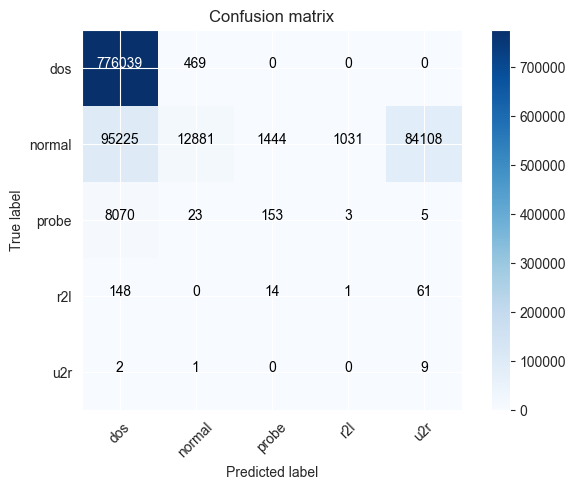

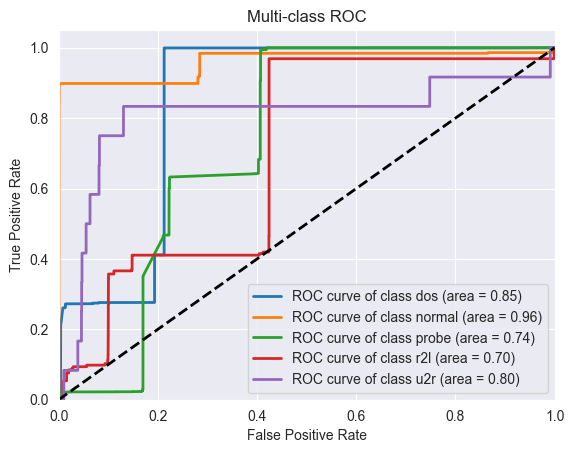

In [46]:
plt.figure()

# Plot Confusion Matrix
plot_confusion_matrix(nb_clf, y_pred_nb)

# Plot ROC curve
plot_multiclass_roc(nb_clf)

### 10. AdaBoost Classifier

In [47]:
# Initialize and train the AdaBoost Classifier
ab_clf = AdaBoostClassifier(random_state=42)
ab_clf.fit(X_resampled, y_resampled)

# Predictions and Evaluation
y_pred_ab = ab_clf.predict(X_test)
print("AdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))

AdaBoost Classifier:
Accuracy: 0.39027158674147966
              precision    recall  f1-score   support

         dos       0.99      0.26      0.41    776508
      normal       0.24      0.89      0.37    194689
       probe       0.31      0.70      0.43      8254
         r2l       0.02      0.90      0.04       224
         u2r       0.00      0.83      0.00        12

    accuracy                           0.39    979687
   macro avg       0.31      0.72      0.25    979687
weighted avg       0.83      0.39      0.40    979687



#### 9.1 Confusion Matrix and ROC/AUC Curve for Ada Boost Classifier

Confusion matrix, without normalization


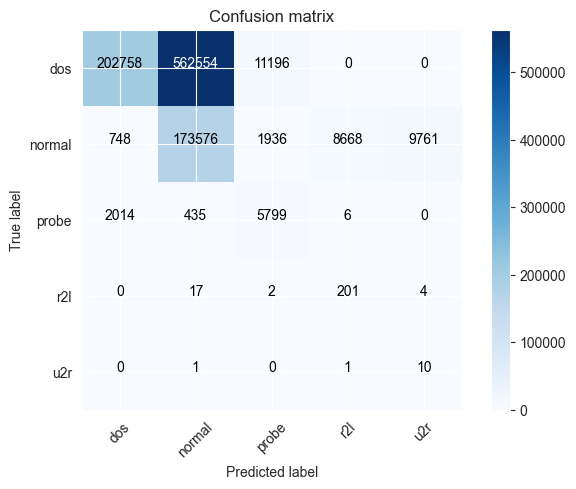

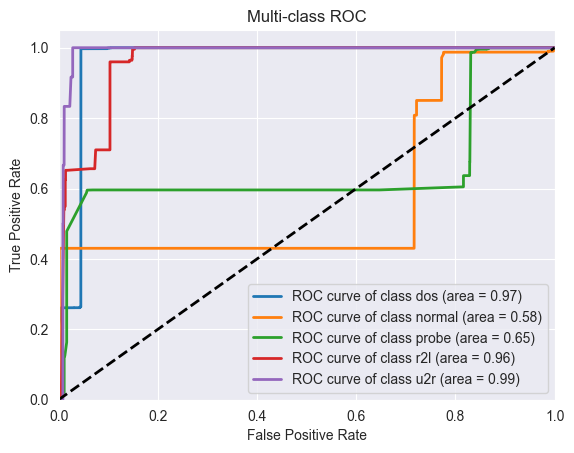

In [48]:
plt.figure()

# Plot Confusion Matrix
plot_confusion_matrix(ab_clf, y_pred_ab)

# Plot ROC curve
plot_multiclass_roc(ab_clf)

### 11. Random Forest Classifier

In [49]:
# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_resampled, y_resampled)

# Predictions and Evaluation
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.9582683040603784
              precision    recall  f1-score   support

         dos       1.00      0.95      0.97    776508
      normal       1.00      1.00      1.00    194689
       probe       0.17      0.99      0.29      8254
         r2l       0.99      0.96      0.98       224
         u2r       0.62      0.67      0.64        12

    accuracy                           0.96    979687
   macro avg       0.75      0.91      0.77    979687
weighted avg       0.99      0.96      0.97    979687



#### 11.1 Confusion Matrix and ROC/AUC Curve for Random Forest Classifier

Confusion matrix, without normalization


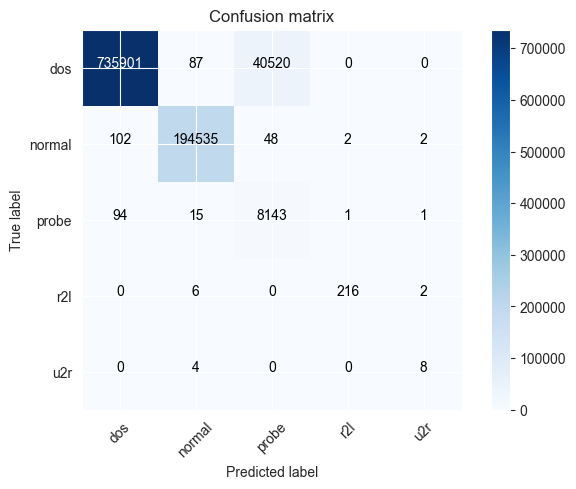

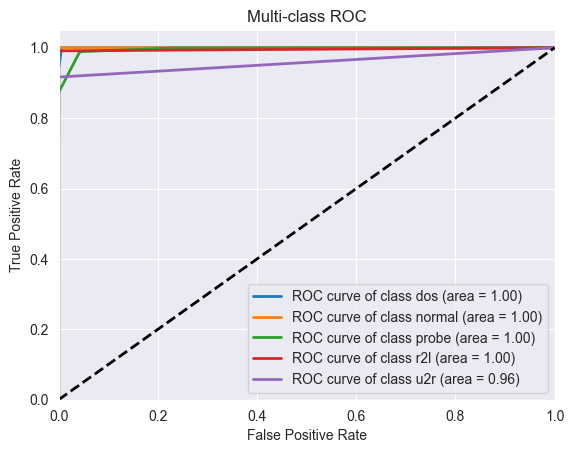

In [50]:
plt.figure()

# Plot Confusion Matrix
plot_confusion_matrix(rf_clf, y_pred_rf)

# Plot ROC curve
plot_multiclass_roc(rf_clf)

### 12. Gradient Boost Classifier

In [51]:
# Initialize and train the Random Forest Classifier
gb_clf= GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_resampled, y_resampled)

# Predictions and Evaluation
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boost Classifier:
Accuracy: 0.9538097371915724
              precision    recall  f1-score   support

         dos       1.00      0.95      0.97    776508
      normal       1.00      0.98      0.99    194689
       probe       0.17      0.98      0.29      8254
         r2l       0.06      0.98      0.11       224
         u2r       0.03      0.75      0.06        12

    accuracy                           0.95    979687
   macro avg       0.45      0.93      0.48    979687
weighted avg       0.99      0.95      0.97    979687



#### 12.1 Generating the Confusion Matrix and ROC Curve for Gradient Boost Classifier

Confusion matrix, without normalization


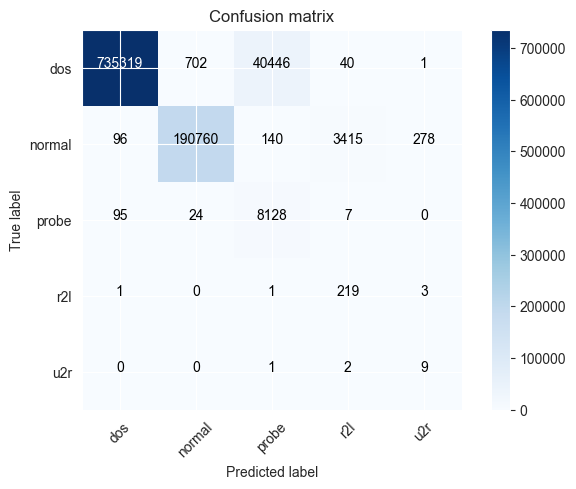

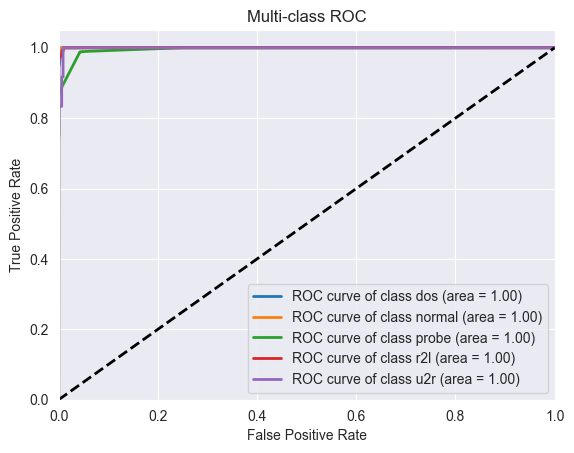

In [52]:
plt.figure()

# Plot Confusion Matrix
plot_confusion_matrix(gb_clf, y_pred_gb)

# Plot ROC curve
plot_multiclass_roc(gb_clf)

# Phase 6 - Evaluate All Models

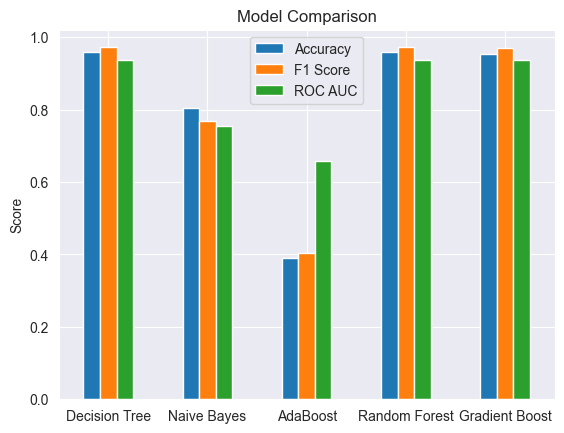

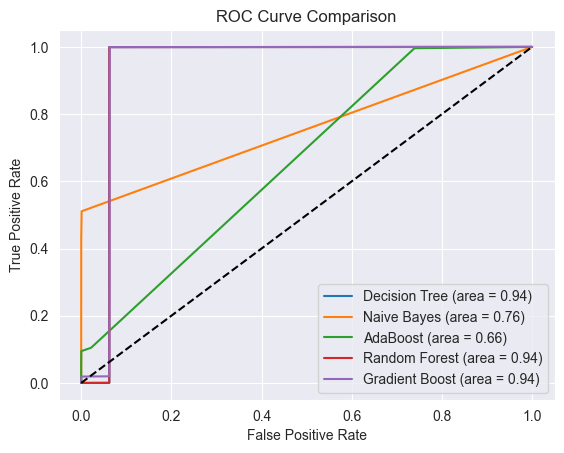

In [53]:
# Create a label encoder object
le = LabelEncoder()

# Fit the encoder on the y_test labels and transform both y_test and predictions
y_test_encoded = le.fit_transform(y_test)
# y_pred_xg_encoded = le.transform(best_preds)
y_pred_dt_encoded = le.transform(y_pred_dt)
y_pred_nb_encoded = le.transform(y_pred_nb)
y_pred_ab_encoded = le.transform(y_pred_ab)
y_pred_rf_encoded = le.transform(y_pred_rf)
y_pred_gb_encoded = le.transform(y_pred_gb)

models = ['Decision Tree', 'Naive Bayes', 'AdaBoost', 'Random Forest', 'Gradient Boost']
y_preds = [y_pred_dt_encoded, y_pred_nb_encoded, y_pred_ab_encoded, y_pred_rf_encoded, y_pred_gb_encoded]
metrics = []

# Calculate metrics
for y_pred in y_preds:
    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred, pos_label=1)  # Adjust pos_label if necessary
    roc_auc = auc(fpr, tpr)
    metrics.append([accuracy, f1, roc_auc])

# Create DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'F1 Score', 'ROC AUC'], index=models)

# Plotting
metrics_df.plot(kind='bar')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

# Plot ROC Curves
for model, y_pred in zip(models, y_preds):
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred, pos_label=1)  # Adjust pos_label if necessary
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

### Hyperparameter Tuning for Random Forest Classifier

In [54]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rf_best_clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=2, cv=5)
rf_best_clf.fit(X_resampled, y_resampled)

print(rf_best_clf.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=25; total time= 3.8min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=25; total time= 3.3min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=25; total time= 3.4min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=25; total time= 4.1min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=25; total time= 3.6min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=50; total time= 5.9min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=50; total time= 6.7min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=50; total time= 6.1min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=50; total time= 6.5min
[CV] END .....max_depth=3, max_leaf_nodes=3, n_estimators=50; total time= 7.5min
[CV] END ....max_depth=3, max_leaf_nodes=3, n_estimators=100; total time= 9.9min
[CV] END ....max_depth=3, max_leaf_nodes=3, n_e

KeyboardInterrupt: 

### Retrain Random Forest Classifier with best parameters

In [55]:
rf_clf_best_param = RandomForestClassifier(
    max_depth=6,
    max_leaf_nodes=9,
    n_estimators=25,
    random_state=42
)
rf_clf_best_param.fit(X_resampled, y_resampled)

# Predictions and Evaluation
y_pred_rf_best_param = rf_clf_best_param.predict(X_test)
print("Random Forest Classifier with best parameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best_param))
print(classification_report(y_test, y_pred_rf_best_param))

Random Forest Classifier with best parameters:
Accuracy: 0.9221016508333784
              precision    recall  f1-score   support

         dos       1.00      0.93      0.97    776508
      normal       1.00      0.87      0.93    194689
       probe       0.11      0.99      0.20      8254
         r2l       0.02      0.96      0.05       224
         u2r       0.01      0.83      0.02        12

    accuracy                           0.92    979687
   macro avg       0.43      0.92      0.43    979687
weighted avg       0.99      0.92      0.95    979687



#### Confusion Matrix and ROC Curve for Random Forest Classifier with best parameters

Confusion matrix, without normalization


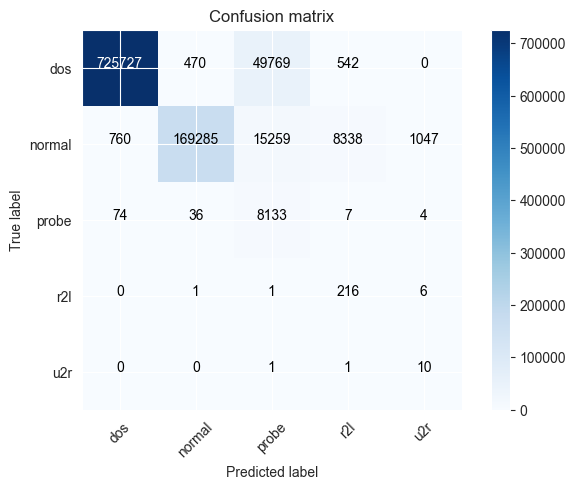

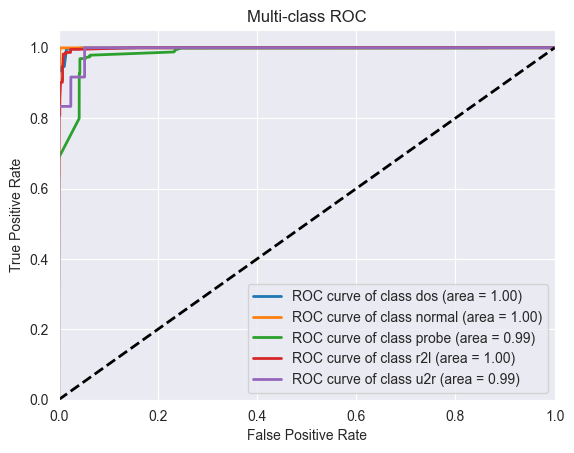

In [56]:
plt.figure()

# Plot Confusion Matrix
plot_confusion_matrix(rf_clf_best_param, y_pred_rf_best_param)

# Plot ROC curve
plot_multiclass_roc(rf_clf_best_param)

# Phase 7: Real-time Anomaly Detection

Turning our model into a real-time anomaly detection system involves several steps.

### 1. **Data Collection in Real-Time**:

   - **Source Integration**: Determine where our real-time data is coming from. This could be network logs, system logs, user behavior data, etc. We want to make sure that we can access and stream this data in real-time.

   - **Preprocessing**: As new data comes in, we'll need to preprocess it in the same way as your training data. This includes feature extraction, transformation, scaling, and encoding.

### 2. **Model Deployment**:

   - **Hosting the Model**: The trained Random Forest model needs to be saved and then loaded into a production environment. Consider using libraries like `joblib` or `pickle` in Python for model serialization and deserialization.

   - **API Integration**: Often, the model will be hosted on a server and accessed via API calls. Solutions like Flask, FastAPI, or Django in Python can be used to create these APIs. Alternatively, cloud platforms offer services like AWS SageMaker or Azure Machine Learning for deploying models.

### 3. **Real-Time Prediction**:

   - As new data points come in, they are sent to the model (either locally or via API). The model then predicts if each data point is an anomaly or not.

   - **Thresholding**: Depending on the nature of your data and the cost of false positives vs. false negatives, you might want to adjust the decision threshold for your model. This can help in fine-tuning the sensitivity of your anomaly detection.

### 4. **Alerts and Monitoring**:

   - If an anomaly is detected, an alert can be triggered. This could be an email, SMS, dashboard update, or any other kind of notification.

   - Monitor the performance of your system. Over time, as the nature of the data changes, the model might need to be retrained. Keep track of false positives and false negatives, and consider setting up a feedback loop where the model can be updated with new labeled examples.

### 5. **Feedback Loop for Continuous Learning**:

   - As the system makes predictions in real-time, there will inevitably be some false positives and false negatives. It's beneficial to have a mechanism where these can be labeled correctly and fed back into the training set. This allows the model to be periodically retrained and improved.

### 6. **Scalability and Performance**:

   - Ensure that the system can handle the volume of real-time data. This might involve optimizing the preprocessing steps, using a faster hardware setup, or even simplifying the model if necessary.

   - **Batch Processing**: If real-time isn't strictly necessary and there's a short allowable delay, consider processing data in small batches rather than one-by-one. This can often be more efficient.

### 7. **Security**:

   - If you're deploying the model as an API, ensure that it's secure. This involves setting up authentication, possibly rate limiting, and ensuring data privacy.

### 8. **Regular Maintenance**:

   - Models can "drift" over time if the underlying data patterns change. Regularly monitor and retrain your model to ensure it remains effective.

To summarize, turning your Random Forest model into a real-time anomaly detection system requires a combination of software engineering, system design, and continuous monitoring and maintenance. It's not just about the model but also about how it's integrated into a larger system.

> **As we can see from above comparision, Random Forest Classifier model perform slightly better thatn XGBoots model. Hence, we are moving forward with RF Classier for real time anomaly detection**

In [ ]:
# Save Random forest classifier for future use
with open('models/full/rf_best_model.pkl','wb') as f:
    pickle.dump(rf_clf,f)